# Gradient Boosted Trees

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('heart_disease.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
df.shape

(303, 15)

In [37]:
df.drop(columns = ['Unnamed: 0'],axis = 1,inplace = True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
# Just find correlation of feature vs target using corrwith
df.drop('target',axis = 1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

### visualize the correlation

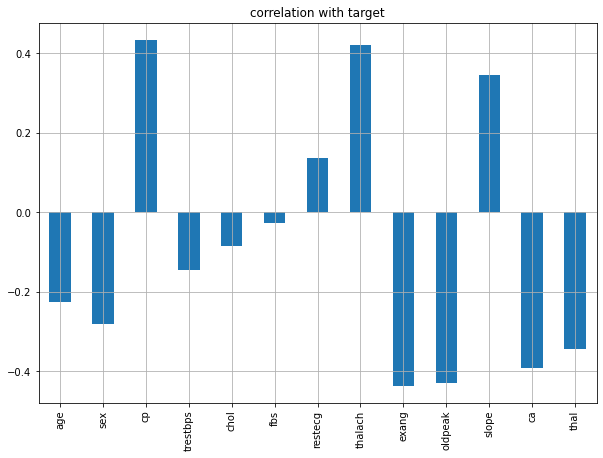

In [40]:
df.drop('target',axis = 1).corrwith(df.target).plot(kind = 'bar',grid = True,figsize = (10,7),title = 'correlation with target')
plt.show()

#### Let's work on feature selection and see if that can help us building better model.

# Model selection using SelectPercentile features.

In [41]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [42]:
# Instantiate SelectPercentile and fit(feature,label)
x = df.drop(columns = ['target'],axis = 1)
y = df['target']
SPercentile = SelectPercentile(score_func = chi2,percentile = 80)
SPercentile = SPercentile.fit(x,y)

In [43]:
# Seperate the features to check p_values.
cols = SPercentile.get_support(indices = True)
print('Feature index =',cols)
features = x.columns[cols]
print('Features =',list(features))


Feature index = [ 0  1  2  3  4  7  8  9 10 11]
Features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [44]:
df_scores = pd.DataFrame({'features': x.columns,'chi2score':SPercentile.scores_,'pvalue':SPercentile.pvalues_})
df_scores.sort_values(by = 'chi2score',ascending = False)

,features,chi2score,pvalue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [45]:
# Create subset of selected feature
x = df[features]
y = df.target

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35,random_state = 3)

# Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [53]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train, y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print('\n========Train Result=============')
print(f'Accuracy score : {accuracy_score(y_train,pred) *100:.2f}%')
print(f'classification report:\n{gbdt_clf_report}')
print(f'Confuion Matrix:\n{confusion_matrix(y_train,pred)}\n')
#******************Test Score**********************
pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print('\n========Test Result=============')
print(f'Accuracy score : {accuracy_score(y_test,pred) *100:.2f}%')
print(f'classification report:\n{clf_report}')
print(f'Confuion Matrix:\n{confusion_matrix(y_test,pred)}\n')


========Train Result=============
Accuracy score : 100.00%
classification report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    93.0  103.0       1.0      196.0         196.0
Confuion Matrix:
[[ 93   0]
 [  0 103]]


========Test Result=============
Accuracy score : 83.18%
classification report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.829268   0.833333  0.831776    0.831301      0.831624
recall      0.755556   0.887097  0.831776    0.821326      0.831776
f1-score    0.790698   0.859375  0.831776    0.825036      0.830492
support    45.000000  62.000000  0.831776  107.000000    107.000000
Confuion Matrix:
[[34 11]
 [ 7 55]]



### Let's try if we can improve the performance of our model using parameter tuning

# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid_param = {
    'max_depth': range(4,8),
    'min_samples_split': range(2,8,2),
    'learning_rate': np.arange(0.1,0.3)
}

In [58]:
grid = GridSearchCV(GradientBoostingClassifier(),param_grid = grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [59]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 6}

In [63]:
gbdt_clf = GradientBoostingClassifier(learning_rate = 0.1,max_depth = 4,min_samples_split = 6)
gbdt_clf.fit(x_train, y_train)
pred = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict = True))
print('\n========Train Result=============')
print(f'Accuracy score : {accuracy_score(y_train,pred) *100:.2f}%')
print(f'classification report:\n{gbdt_clf_report}')
print(f'Confuion Matrix:\n{confusion_matrix(y_train,pred)}\n')
#******************Test Score**********************
pred = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict = True))
print('\n========Test Result=============')
print(f'Accuracy score : {accuracy_score(y_test,pred) *100:.2f}%')
print(f'classification report:\n{clf_report}')
print(f'Confuion Matrix:\n{confusion_matrix(y_test,pred)}\n')


========Train Result=============
Accuracy score : 100.00%
classification report:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    93.0  103.0       1.0      196.0         196.0
Confuion Matrix:
[[ 93   0]
 [  0 103]]


========Test Result=============
Accuracy score : 84.11%
classification report:
                   0          1  accuracy   macro avg  weighted avg
precision   0.818182   0.857143  0.841121    0.837662      0.840757
recall      0.800000   0.870968  0.841121    0.835484      0.841121
f1-score    0.808989   0.864000  0.841121    0.836494      0.840864
support    45.000000  62.000000  0.841121  107.000000    107.000000
Confuion Matrix:
[[36  9]
 [ 8 54]]

